# Spherical Lens

In [7]:
import numpy as np

## Ray class

In [8]:
# --- Ray class ---
class Ray:
    def __init__(self, x0=0, y0=0, x1=1, y1=1, n=1.0):
        self.x0 = x0
        self.y0 = y0
        self.x1 = x1
        self.y1 = y1
        self.n = n
        self.length = np.sqrt((x1 - x0)**2 + (y1 - y0)**2)
        self.opl = self.length * n
        self.direction = np.array([x1 - x0, y1 - y0]) / self.length

## Define a surface

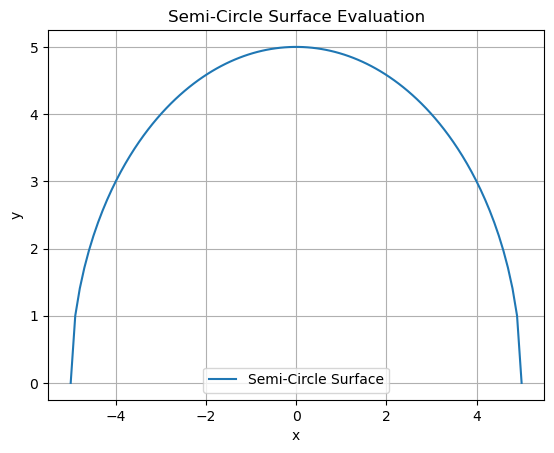

In [9]:
# Define a semi-circle surface
def semi_circle(x, radius=1):
    return np.sqrt(radius**2 - x**2)

x_array = np.linspace(-5, 5, 100)
y_array = semi_circle(x_array, radius=5)

# Plot the surface
import matplotlib.pyplot as plt
plt.plot(x_array, y_array, label='Semi-Circle Surface')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Semi-Circle Surface Evaluation')
plt.grid()
plt.legend()
plt.show()

## Rotate coordinates

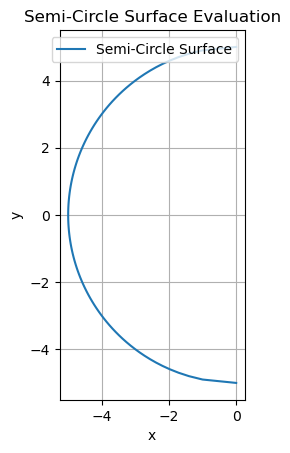

In [10]:
def rotate_coordinates(x, y, angle):
    rotated_x = x * np.cos(angle) - y * np.sin(angle)
    rotated_y = x * np.sin(angle) + y * np.cos(angle)
    return rotated_x, rotated_y

x_array, y_array = rotate_coordinates(x_array, y_array, np.radians(90))

# Plot the surface
import matplotlib.pyplot as plt
plt.plot(x_array, y_array, label='Semi-Circle Surface')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Semi-Circle Surface Evaluation')
plt.grid()
plt.legend()
plt.gca().set_aspect('equal')
plt.show()

## Propagate a ray to a point on the surface
- Why does the discriminant method work?

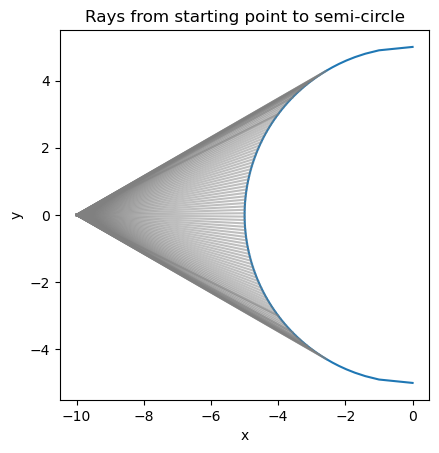

In [11]:
# Define the starting point of the ray
start_x = -10
start_y = 0

# Plot the semi-circle surface
plt.plot(x_array, y_array)

# Plot the rays
for i in range(len(x_array)):
    ray = Ray(x0=start_x, y0=start_y, x1=x_array[i], y1=y_array[i], n=1.5)
    
    # Calculate the distance from the starting point to the intersection with the circle
    A = ray.direction[0]**2 + ray.direction[1]**2
    B = 2 * (ray.x0 * ray.direction[0] + ray.y0 * ray.direction[1])
    C = ray.x0**2 + ray.y0**2 - 5**2
    
    discriminant = B**2 - 4 * A * C
    
    if discriminant >= 0:
        t = (-B - np.sqrt(discriminant)) / (2 * A)
        if t >= 0:
            intersection_x = ray.x0 + t * ray.direction[0]
            intersection_y = ray.y0 + t * ray.direction[1]
            plt.plot([ray.x0, intersection_x], [ray.y0, intersection_y], color='gray', alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Rays from starting point to semi-circle')
plt.gca().set_aspect('equal')
plt.show()

## Define the normal along everywhere on the surface

## Find the angle between the incoming ray and the normal

## Compute the outgoing angle

## Find out what kind of terms are used to define the surface of a refractive lens